<a href="https://colab.research.google.com/github/shangeth/Google-ML-Academy/blob/master/2-Deep-Neural-Networks/2_4_Learning_Rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><a href='https://shangeth.com/courses/'>Deep Learning - Beginners Track</a></h1></center>
<center><h3>Instructor: <a href='https://shangeth.com/'>Shangeth Rajaa</a></h3></center>
<hr>

# Learning Rate 

In Gradient Descent we update the parameters of the model with

 $w := w - \alpha \frac{\partial \mathcal{L}}{\partial w}$ and $b := b - \alpha \frac{\partial \mathcal{L}}{\partial b}$.

 The learning rate $\alpha$ actually affects the learning process a lot. 

 - small $\alpha$ is slow, but more accuracte, as it does not miss the minimum, but it also get stuck in the local minimum.
 - larger $\alpha$ make huge steps, sometimes it may converge faster but it may miss the minima.

Learning rate is an important hyper parameter in training a Model. It is important to understand to tune the learning rate.

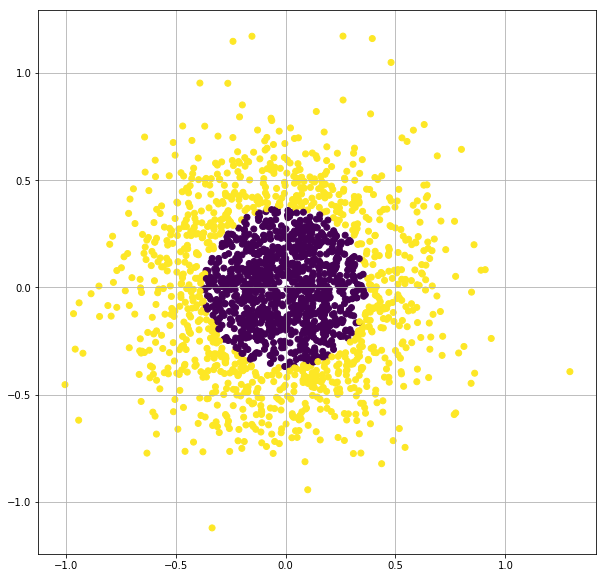

Train = 1120
Test = 600
Val = 280


In [1]:
from sklearn.datasets import make_gaussian_quantiles
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X, y = make_gaussian_quantiles(n_samples=2000, n_features=2, n_classes=2, random_state=3, cov=0.1)

plt.figure(figsize=(10,10))
plt.scatter(X[:,0], X[:,1],c=y)
plt.grid(True)
plt.show()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=True)

print('Train = {}\nTest = {}\nVal = {}'.format(len(X_train), len(X_test), len(X_val)))

## Large Learning rate

We will use adam optimizer with learning rate of 0.5

W0903 06:12:55.336309 139678620190592 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0903 06:12:55.442114 139678620190592 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 1120 samples, validate on 280 samples
Epoch 1/50
1120/1120 [==============================] - 0s 130us/sample - loss: 0.8366 - acc: 0.4786 - val_loss: 0.7390 - val_acc: 0.4464
Epoch 2/50
1120/1120 [==============================] - 0s 22us/sample - loss: 0.7115 - acc: 0.4902 - val_loss: 0.7462 - val_acc: 0.4464
Epoch 3/50
1120/1120 [==============================] - 0s 21us/sample - loss: 0.7073 - acc: 0.4991 - val_loss: 0.8276 - val_acc: 0.4464
Epoch 4/50
1120/1120 [==============================] - 0s 22us/sample - loss: 0.8010 - acc: 0.4920 - val_loss: 0.7248 - val_acc: 0.4464
Epoch 5/50
1120/1120 [==============================] - 0s 22us/sample - loss: 0.7252 - acc: 0.4884 - val_loss: 0.7083 - val_acc: 0.5536
Epoch 6/50
1120/1120 [==============================] - 0s 24us/sample - loss: 0.7258 - acc: 0.4920 - val_loss: 0.6917 - val_acc: 0.5536
Epoch 7/50
1120/1120 [==============================] - 0s 21us/sample - loss: 0.7651 - acc: 0.4866 - val_loss: 0.6888 - val_acc: 

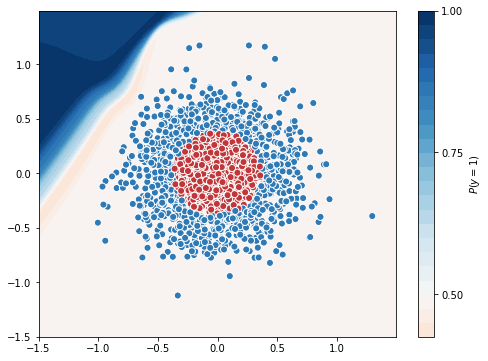


Test Accuracy =  0.49666666666666665


In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
tf.keras.backend.clear_session()

# random number initialized will to same, for reproducing same results.
np.random.seed(0)
tf.set_random_seed(0)

model = tf.keras.Sequential([
                             keras.layers.Dense(units=10, input_shape=[2]), 
                             keras.layers.Activation('tanh'),
                             keras.layers.Dense(units=10),
                             keras.layers.Activation('tanh'),
                             keras.layers.Dense(units=1), 
                             keras.layers.Activation('sigmoid')
                             ])

# we used the default optimizer parameters by using optimizer='adam'
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# we can also define optimizer with
optimizer = tf.keras.optimizers.Adam(lr=0.5)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
tf_history = model.fit(X_train, y_train, batch_size=100, epochs=50, verbose=True, validation_data=(X_val, y_val))


# contour plot
xx, yy = np.mgrid[-1.5:1.5:.01, -1.5:1.5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = model.predict(grid)[:,0].reshape(xx.shape)

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X[:,0], X[:, 1], c=y, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

plt.show()

# test accuracy
from sklearn.metrics import accuracy_score
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score((y_test_pred > 0.5), y_test)

print('\nTest Accuracy = ', test_accuracy)


This is one of the worst model you can train, as the learning rate is very high the optimizer skips all the minima and the loss does not really reduces much.

## Small Learning rate

We will use adam optimizer with learning rate of 0.00001

Train on 1120 samples, validate on 280 samples
Epoch 1/50
1120/1120 [==============================] - 0s 108us/sample - loss: 0.7051 - acc: 0.5018 - val_loss: 0.7056 - val_acc: 0.4821
Epoch 2/50
1120/1120 [==============================] - 0s 22us/sample - loss: 0.7050 - acc: 0.5018 - val_loss: 0.7055 - val_acc: 0.4821
Epoch 3/50
1120/1120 [==============================] - 0s 22us/sample - loss: 0.7049 - acc: 0.5027 - val_loss: 0.7055 - val_acc: 0.4821
Epoch 4/50
1120/1120 [==============================] - 0s 28us/sample - loss: 0.7049 - acc: 0.5027 - val_loss: 0.7055 - val_acc: 0.4821
Epoch 5/50
1120/1120 [==============================] - 0s 22us/sample - loss: 0.7048 - acc: 0.5027 - val_loss: 0.7054 - val_acc: 0.4821
Epoch 6/50
1120/1120 [==============================] - 0s 22us/sample - loss: 0.7048 - acc: 0.5027 - val_loss: 0.7054 - val_acc: 0.4821
Epoch 7/50
1120/1120 [==============================] - 0s 21us/sample - loss: 0.7047 - acc: 0.5027 - val_loss: 0.7053 - val_acc: 

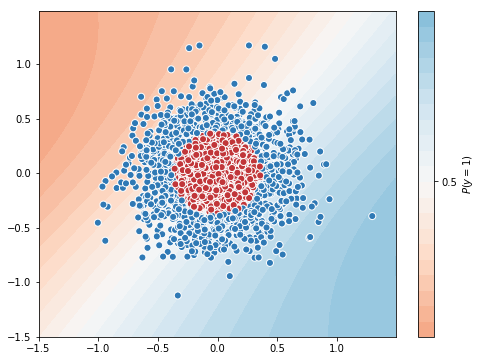


Test Accuracy =  0.5116666666666667


In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
tf.keras.backend.clear_session()

# random number initialized will to same, for reproducing same results.
np.random.seed(0)
tf.set_random_seed(0)

model = tf.keras.Sequential([
                             keras.layers.Dense(units=10, input_shape=[2]), 
                             keras.layers.Activation('tanh'),
                             keras.layers.Dense(units=10),
                             keras.layers.Activation('tanh'),
                             keras.layers.Dense(units=1), 
                             keras.layers.Activation('sigmoid')
                             ])

# we used the default optimizer parameters by using optimizer='adam'
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# we can also define optimizer with
optimizer = tf.keras.optimizers.Adam(lr=0.00001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
tf_history = model.fit(X_train, y_train, batch_size=100, epochs=50, verbose=True, validation_data=(X_val, y_val))


# contour plot
xx, yy = np.mgrid[-1.5:1.5:.01, -1.5:1.5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = model.predict(grid)[:,0].reshape(xx.shape)

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X[:,0], X[:, 1], c=y, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

plt.show()

# test accuracy
from sklearn.metrics import accuracy_score
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score((y_test_pred > 0.5), y_test)

print('\nTest Accuracy = ', test_accuracy)


The loss in this model seems to reduce, but at a very slow rate, so we need to train for more epochs to get a good model.

## Medium Learning rate

We will use adam optimizer with learning rate of 0.005

Train on 1120 samples, validate on 280 samples
Epoch 1/50
1120/1120 [==============================] - 0s 114us/sample - loss: 0.6968 - acc: 0.5188 - val_loss: 0.6958 - val_acc: 0.3679
Epoch 2/50
1120/1120 [==============================] - 0s 28us/sample - loss: 0.6926 - acc: 0.4098 - val_loss: 0.6941 - val_acc: 0.4643
Epoch 3/50
1120/1120 [==============================] - 0s 26us/sample - loss: 0.6910 - acc: 0.5214 - val_loss: 0.6899 - val_acc: 0.5500
Epoch 4/50
1120/1120 [==============================] - 0s 21us/sample - loss: 0.6898 - acc: 0.5107 - val_loss: 0.6933 - val_acc: 0.4393
Epoch 5/50
1120/1120 [==============================] - 0s 23us/sample - loss: 0.6896 - acc: 0.4670 - val_loss: 0.6904 - val_acc: 0.5071
Epoch 6/50
1120/1120 [==============================] - 0s 25us/sample - loss: 0.6891 - acc: 0.6187 - val_loss: 0.6834 - val_acc: 0.6786
Epoch 7/50
1120/1120 [==============================] - 0s 22us/sample - loss: 0.6890 - acc: 0.6054 - val_loss: 0.6872 - val_acc: 

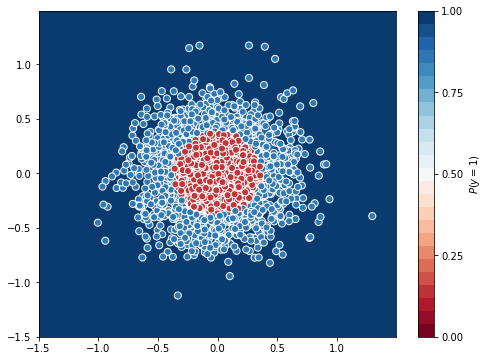


Test Accuracy =  0.96


In [5]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
tf.keras.backend.clear_session()

# random number initialized will to same, for reproducing same results.
np.random.seed(0)
tf.set_random_seed(0)

model = tf.keras.Sequential([
                             keras.layers.Dense(units=10, input_shape=[2]), 
                             keras.layers.Activation('tanh'),
                             keras.layers.Dense(units=10),
                             keras.layers.Activation('tanh'),
                             keras.layers.Dense(units=1), 
                             keras.layers.Activation('sigmoid')
                             ])

# we used the default optimizer parameters by using optimizer='adam'
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# we can also define optimizer with
optimizer = tf.keras.optimizers.Adam(lr=0.005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
tf_history = model.fit(X_train, y_train, batch_size=100, epochs=50, verbose=True, validation_data=(X_val, y_val))


# contour plot
xx, yy = np.mgrid[-1.5:1.5:.01, -1.5:1.5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = model.predict(grid)[:,0].reshape(xx.shape)

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X[:,0], X[:, 1], c=y, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

plt.show()

# test accuracy
from sklearn.metrics import accuracy_score
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score((y_test_pred > 0.5), y_test)

print('\nTest Accuracy = ', test_accuracy)


See how tuning the model from an accuracy of 0.49 to 0.96. Hyper parameter tuning is so critical in getting a good learning model.

![](https://miro.medium.com/max/2470/0*K0ltbXIgtNLEXsXN.png)
[Image Source](https://www.jeremyjordan.me)

# Learning Rate Scheduling

We have seen how crucial Learning rate is for training a model. It is also possible that near some minima our optimal learning rate may be big and it doesn't reach the minima , at that point we may want to reduce the learning rate. This is learning rate scheduling. Instead of using a constant learning rate, we change the learning rate during training to reach the minima.

There are many types of lr scheduling

- step decay
- cosine decay
- reduce on plateau
- cycline decay

![](https://3.bp.blogspot.com/-fAN358JEMLc/Wrv1iH17eiI/AAAAAAAAChg/0djM3boHeJA_V_JfBHH8dMS32ekgtic7QCLcBGAs/s640/image1.png)



LR scheduling can easily be done in Tensorflow 
```

def scheduler(epoch):
  if epoch < 10:
    return 0.001
  else:
    return 0.001 * tf.math.exp(0.1 * (10 - epoch))

callback = tf.keras.callbacks.LearningRateScheduler(scheduler)
model.fit(data, labels, epochs=100, callbacks=[callback],
          validation_data=(val_data, val_labels))
```

Let's train a model with [ReduceOnPlateau](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ReduceLROnPlateau) lr scheduling. This checks the loss after every epoch, if the loss is not decreasing for few epochs(say 5) then it reduces the learning by a factor(say 0.1).

## ReduceOnPlateau in TensorFlow

Train on 1120 samples, validate on 280 samples
Epoch 1/100
1120/1120 [==============================] - 0s 156us/sample - loss: 0.6948 - acc: 0.5321 - val_loss: 0.6631 - val_acc: 0.8321
Epoch 2/100
1120/1120 [==============================] - 0s 45us/sample - loss: 0.6391 - acc: 0.6527 - val_loss: 0.6036 - val_acc: 0.7821
Epoch 3/100
1120/1120 [==============================] - 0s 40us/sample - loss: 0.5800 - acc: 0.7411 - val_loss: 0.4805 - val_acc: 0.8143
Epoch 4/100
1120/1120 [==============================] - 0s 39us/sample - loss: 0.4777 - acc: 0.7812 - val_loss: 0.4168 - val_acc: 0.8643
Epoch 5/100
1120/1120 [==============================] - 0s 43us/sample - loss: 0.3391 - acc: 0.8777 - val_loss: 0.2586 - val_acc: 0.9107
Epoch 6/100
1120/1120 [==============================] - 0s 45us/sample - loss: 0.2405 - acc: 0.9071 - val_loss: 0.1628 - val_acc: 0.9750
Epoch 7/100
1120/1120 [==============================] - 0s 43us/sample - loss: 0.1664 - acc: 0.9545 - val_loss: 0.1164 - va

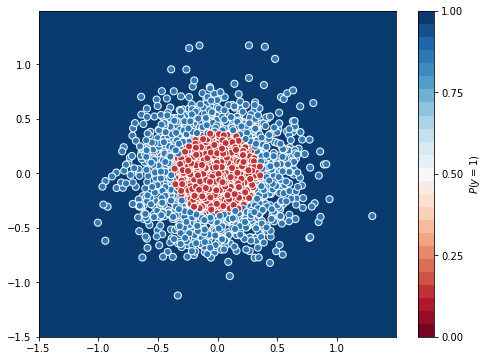


Test Accuracy =  0.9916666666666667


In [19]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
tf.keras.backend.clear_session()

# random number initialized will to same, for reproducing same results.
np.random.seed(0)
tf.set_random_seed(0)

model = tf.keras.Sequential([
                             keras.layers.Dense(units=10, input_shape=[2]), 
                             keras.layers.Activation('tanh'),
                             keras.layers.Dense(units=10),
                             keras.layers.Activation('tanh'),
                             keras.layers.Dense(units=1), 
                             keras.layers.Activation('sigmoid')
                             ])

optimizer = tf.keras.optimizers.Adam(lr=0.05)

from tensorflow.keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=0.00001, verbose=True)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
tf_history = model.fit(X_train, y_train, batch_size=50, epochs=100, verbose=True, validation_data=(X_val, y_val), callbacks=[reduce_lr])


# contour plot
xx, yy = np.mgrid[-1.5:1.5:.01, -1.5:1.5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = model.predict(grid)[:,0].reshape(xx.shape)

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X[:,0], X[:, 1], c=y, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

plt.show()

# test accuracy
from sklearn.metrics import accuracy_score
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score((y_test_pred > 0.5), y_test)

print('\nTest Accuracy = ', test_accuracy)


You can see how the learning rates are decreasing when validation loss is not decreasing for 10 steps. Learning rate scheduling will improve the model performance, you will observe it when you train a real world large dataset.